# Plots

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Optional
import numpy as np
from scipy import stats

## Error Category

IndexError: list index out of range

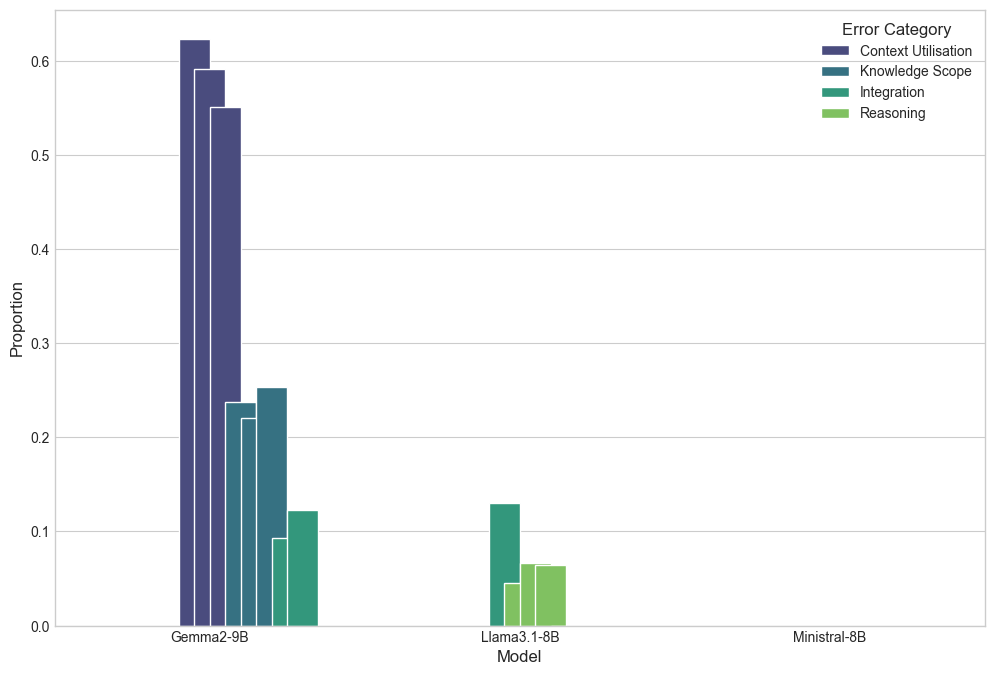

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reshape data for visualization
models = ['Gemma2-9B', 'Llama3.1-8B', 'Ministral-8B']
prompt_types = ['Standard', 'CoT']
error_categories = ['Context Utilisation', 'Knowledge Scope', 'Integration', 'Reasoning']

# Normalized data (proportions)
data = {
    'Gemma2-9B': {
        'Standard': [0.501, 0.293, 0.149, 0.056],
        'CoT': [0.746, 0.182, 0.038, 0.034]
    },
    'Llama3.1-8B': {
        'Standard': [0.514, 0.272, 0.154, 0.061],
        'CoT': [0.668, 0.170, 0.091, 0.071]
    },
    'Ministral-8B': {
        'Standard': [0.518, 0.265, 0.163, 0.053],
        'CoT': [0.585, 0.242, 0.098, 0.075]
    }
}

# Prepare data for plotting
df_list = []
for model in models:
    for prompt in prompt_types:
        for i, category in enumerate(error_categories):
            df_list.append({
                'Model': model,
                'Prompt': prompt,
                'Error Category': category,
                'Proportion': data[model][prompt][i]
            })

df = pd.DataFrame(df_list)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create a palette that distinguishes the error categories effectively
colors = sns.color_palette("viridis", 4)

# Create the grouped bar chart
ax = sns.barplot(
    x='Model', 
    y='Proportion',
    hue='Error Category',
    data=df,
    palette=colors,
    dodge=True,
    errorbar=None
)

# Split the bars further by prompt type
bar_width = 0.1
positions = []
current_pos = 0

for i, model in enumerate(models):
    for j, prompt in enumerate(prompt_types):
        model_prompt_data = df[(df['Model'] == model) & (df['Prompt'] == prompt)]
        position = i + (j - 0.5) * bar_width * 2
        
        for k, (_, row) in enumerate(model_prompt_data.iterrows()):
            bar_position = position + k * bar_width/2
            ax.patches[current_pos].set_x(bar_position)
            ax.patches[current_pos].set_width(bar_width)
            current_pos += 1

# Customize the plot
plt.title('Error Category Distribution: Standard vs. Chain-of-Thought Prompting', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Proportion of Errors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Create custom x-tick labels to show the prompt type
plt.xticks([i for i in range(len(models))], models)

# Add annotations for the prompt types
for i, model in enumerate(models):
    plt.text(i-0.25, -0.05, 'Standard', rotation=90, ha='center', fontsize=10)
    plt.text(i+0.25, -0.05, 'CoT', rotation=90, ha='center', fontsize=10)

# Add a legend with a title
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles, 
    labels, 
    title='Error Category', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    fontsize=12
)

plt.tight_layout()
plt.savefig('error_category_shift.png', dpi=300, bbox_inches='tight')
plt.show()

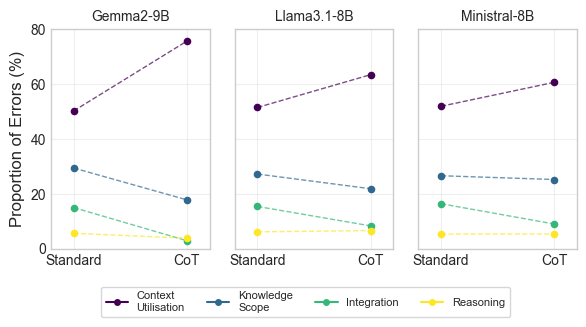

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define models, categories, and color scheme
categories = ['Context\nUtilisation', 'Knowledge\nScope', 'Integration', 'Reasoning']
models = ['Gemma2-9B', 'Llama3.1-8B', 'Ministral-8B']
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Updated data from the provided table (proportions calculated from raw counts)
data = {
    'Gemma2-9B': {
        'Standard': [0.501358695652174, 0.29347826086956524, 0.14945652173913043, 0.05570652173913043],
        'CoT': [0.7556904400606981, 0.17754172989377845, 0.028831562974203338, 0.03793626707132018]
    },
    'Llama3.1-8B': {
        'Standard': [0.5139593908629442, 0.2715736040609137, 0.15355329949238578, 0.06091370558375635],
        'CoT': [0.6334586466165414, 0.21804511278195488, 0.08270676691729323, 0.06578947368421052]
    },
    'Ministral-8B': {
        'Standard': [0.5184275184275184, 0.26535626535626533, 0.16339066339066338, 0.052825552825552825],
        'CoT': [0.6057068741893644, 0.251621271076524, 0.08949416342412451, 0.05317769130998703]
    }
}

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(6, 3), sharey=True)

# Plot data for each model
for i, model in enumerate(models):
    ax = axes[i]
    
    # Extract data for this model
    standard_data = data[model]['Standard']
    cot_data = data[model]['CoT']
    
    # Plot points and connecting lines
    for j, (std, cot) in enumerate(zip(standard_data, cot_data)):
        ax.scatter([0, 1], [std * 100, cot * 100], s=20, color=colors[j], zorder=3)
        ax.plot([0, 1], [std * 100, cot * 100], '--', color=colors[j], linewidth=1, alpha=0.7)
    
    # Set labels and formatting
    if i == 0:
        ax.set_ylabel('Proportion of Errors (%)', fontsize=12)
    
    ax.set_title(model, fontsize=10)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Standard', 'CoT'])
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 80)
    ax.grid(True, alpha=0.3)

# Add layout adjustments
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], label=cat,
                             markerfacecolor=colors[i], markersize=4)
                  for i, cat in enumerate(categories)]
fig.legend(handles=legend_elements,
          bbox_to_anchor=(0.87, 0.01),
          ncol=4, frameon=True, fontsize=8)

plt.savefig('error_category_shift_connected.png', dpi=300, bbox_inches='tight')
plt.show()

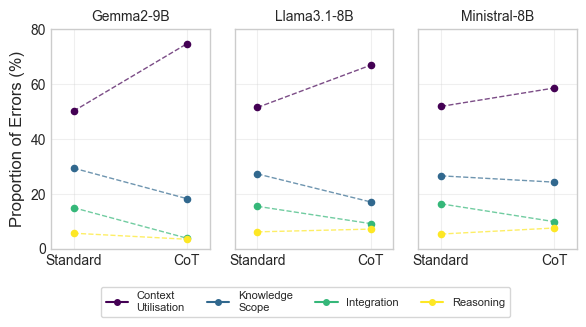

In [125]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Context\nUtilisation', 'Knowledge\nScope', 'Integration', 'Reasoning']
models = ['Gemma2-9B', 'Llama3.1-8B', 'Ministral-8B']
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

fig, axes = plt.subplots(1, 3, figsize=(6, 3), sharey=True)
# fig.suptitle('Shift in Error Categories from Standard to CoT Prompting', fontsize=12)

for i, model in enumerate(models):
    ax = axes[i]
    
    # Extract data for this model
    standard_data = data[model]['Standard']
    cot_data = data[model]['CoT']
    
    # Plot points
    for j, (std, cot) in enumerate(zip(standard_data, cot_data)):
        ax.scatter([0, 1], [std * 100, cot * 100], s=20, color=colors[j], zorder=3)
        ax.plot([0, 1], [std * 100, cot * 100], '--', color=colors[j], linewidth=1, alpha=0.7)
    
    # Set labels
    if i == 0:
        ax.set_ylabel('Proportion of Errors (%)', fontsize=12)
    
    ax.set_title(model, fontsize=10)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Standard', 'CoT'])
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 80)
    ax.grid(True, alpha=0.3)
    
    # Add category labels
    # for j, category in enumerate(categories):
    #     ax.annotate(category, 
    #                xy=(0.5, (standard_data[j] + cot_data[j])/2),
    #                xytext=(0.5, (standard_data[j] + cot_data[j])/2 + 0.03),
    #                ha='center', 
    #                fontsize=9,
    #                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], label=cat,
                              markerfacecolor=colors[i], markersize=4)
                  for i, cat in enumerate(categories)]
fig.legend(handles=legend_elements,
        #    loc='lower right',
           bbox_to_anchor=(0.87, 0.01),
          ncol=4, frameon=True, fontsize=8)

plt.savefig('error_category_shift_connected.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x800 with 0 Axes>

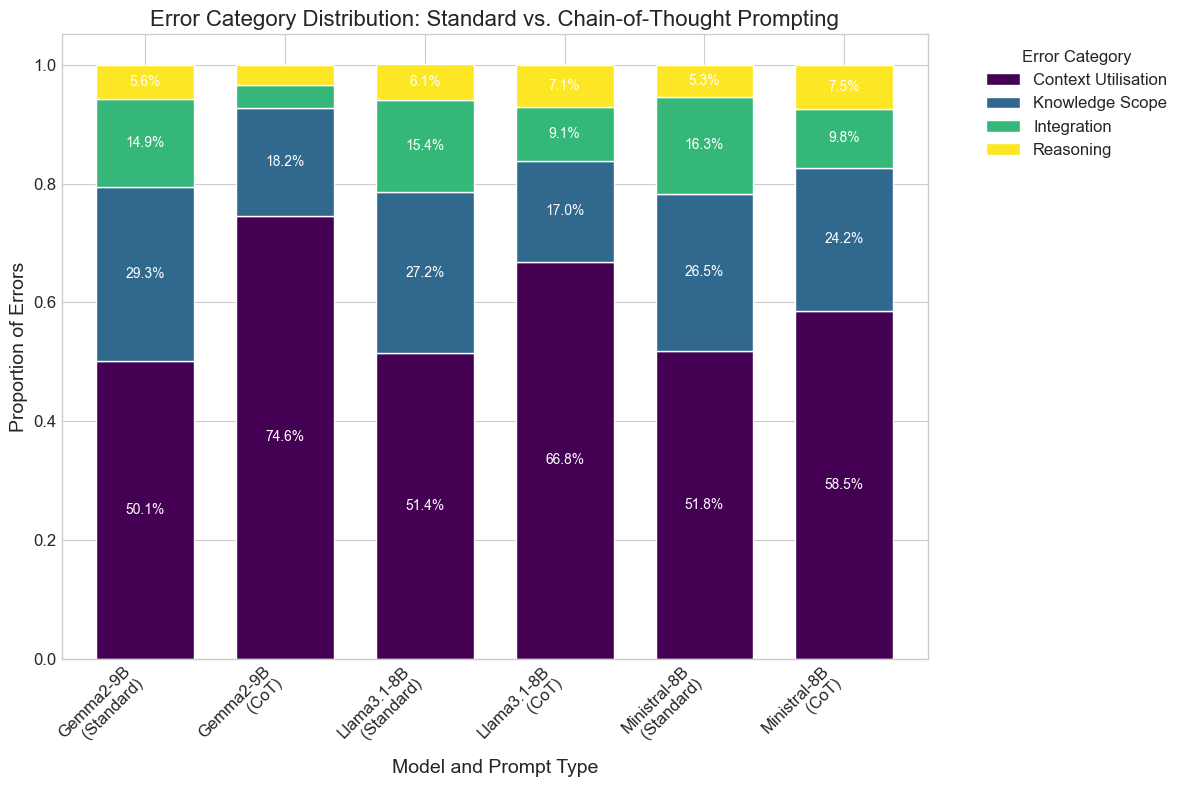

In [37]:
# Similar setup code as above

# Create the stacked bar chart
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Reshape data for stacked bars
stacked_data = []
for model in models:
    for prompt in prompt_types:
        model_prompt = f"{model}\n({prompt})"
        row = {'Model-Prompt': model_prompt}
        for i, category in enumerate(error_categories):
            row[category] = data[model][prompt][i]
        stacked_data.append(row)

stacked_df = pd.DataFrame(stacked_data)
stacked_df = stacked_df.set_index('Model-Prompt')

# Plot stacked bars
ax = stacked_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='viridis',
    width=0.7
)

# Customize the plot
plt.title('Error Category Distribution: Standard vs. Chain-of-Thought Prompting', fontsize=16)
plt.xlabel('Model and Prompt Type', fontsize=14)
plt.ylabel('Proportion of Errors', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Error Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add percentage labels on each segment
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:.1%}' if x > 0.05 else '' for x in container.datavalues], 
                 label_type='center', fontsize=10, color='white')

plt.tight_layout()
plt.savefig('error_category_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
df = pd.read_csv("processed_results_incl_cat.csv")
df = df[df["if_solvable"]==True]

/var/folders/hz/2p3755kd3_z5r99x4v8bwl740000gn/T/ipykernel_24599/929793091.py:1: DtypeWarning: Columns (16,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("processed_results_incl_cat.csv")


In [6]:
df.head()

,question,model_answer,correct_answer,is_correct,number_of_hops,if_solvable,exam_name,task_domain,exam_taker,rag_type,...,Inference,Comparison,Temporal,Other,error_primary_category,error_subcategory,error_confidence,error_information_overlap,error_reasoning_steps_identified,error_external_knowledge_ratio
0,"Based on the provided information, what is the...",B,B,True,2,True,gemma2_9b_Rerank_exam_new_gemma2_9b_processed_...,gov_report,gemma2_9b,Rerank,...,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
1,Considering the various perspectives presented...,C,C,True,2,True,gemma2_9b_Rerank_exam_new_gemma2_9b_processed_...,gov_report,gemma2_9b,Rerank,...,True,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,Based on the information provided in the docum...,C,C,True,2,True,gemma2_9b_Rerank_exam_new_gemma2_9b_processed_...,gov_report,gemma2_9b,Rerank,...,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,Given the emphasis on strengthening CIO author...,C,C,True,2,True,gemma2_9b_Rerank_exam_new_gemma2_9b_processed_...,gov_report,gemma2_9b,Rerank,...,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,Considering the multifaceted approaches to add...,C,C,True,2,True,gemma2_9b_Rerank_exam_new_gemma2_9b_processed_...,gov_report,gemma2_9b,Rerank,...,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['question', 'model_answer', 'correct_answer', 'is_correct',
       'number_of_hops', 'if_solvable', 'exam_name', 'task_domain',
       'exam_taker', 'rag_type', 'chunk_size', 'version',
       'internal_prevention', 'CoT', 'self_ask', 'number_of_chunks',
       'error_classification', 'Inference', 'Comparison', 'Temporal', 'Other',
       'error_primary_category', 'error_subcategory', 'error_confidence',
       'error_information_overlap', 'error_reasoning_steps_identified',
       'error_external_knowledge_ratio'],
      dtype='object')

In [30]:
domain_df = df
domain_df = domain_df[(domain_df["CoT"]==False) & (domain_df["self_ask"]==False)]
domain_plot_df = domain_df.groupby(["exam_taker", "task_domain", "chunk_size", "rag_type"], as_index=False).agg({"is_correct": ["mean", "count"]})
domain_plot_df.columns = ["exam_taker", "task_domain", "chunk_size", "rag_type", "accuracy", "count"]
domain_plot_df

,exam_taker,task_domain,chunk_size,rag_type,accuracy,count
0,gemma2_9b,SecFilings,512,Dense,0.585821,1072
1,gemma2_9b,SecFilings,512,Hybrid,0.590485,1072
2,gemma2_9b,SecFilings,512,Rerank,0.591418,1072
3,gemma2_9b,SecFilings,512,Sparse,0.539179,1072
4,gemma2_9b,SecFilings,1024,Dense,0.615672,536
...,...,...,...,...,...,...
235,ministral_8b,wiki,2048,Sparse,0.485014,367
236,ministral_8b,wiki,4000,Dense,0.495913,367
237,ministral_8b,wiki,4000,Hybrid,0.512262,367
238,ministral_8b,wiki,4000,Rerank,0.504087,367


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import numpy as np

def visualize_accuracy_by_factor(df, factor_name, output_path=None, 
                               figsize=(10, 6), dpi=300, 
                               error_bars=True, 
                               palette="colorblind",
                               style=None):
    """
    Generates publication-quality line plots of accuracy by the specified factor.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the experimental results with columns 
        'is_correct', 'mean', and the specified factor.
    factor_name : str
        The column name to group accuracy by (e.g., 'exam_taker', 'rag_type').
    output_path : str, optional
        Path to save the figure. If None, the figure is shown but not saved.
    figsize : tuple, optional
        Figure size (width, height) in inches.
    dpi : int, optional
        Resolution for saved figure.
    error_bars : bool, optional
        Whether to include error bars (95% confidence intervals).
    palette : str, optional
        Color palette name from seaborn.
    style : str, optional
        Additional categorical variable to use for line style differentiation.
    
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object containing the plot.
    """
    # Set publication-ready style
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'Computer Modern Roman'],
        'font.size': 11,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'legend.title_fontsize': 12
    })
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Group data by factor and compute statistics
    grouped = df.groupby(factor_name)['accuracy'].agg(['mean', 'std', 'count']).reset_index()
    
    # Calculate 95% confidence intervals
    grouped['ci_95'] = 1.96 * grouped['std'] / np.sqrt(grouped['count'])
    
    # Sort by mean value for clearer visualization
    grouped = grouped.sort_values('mean', ascending=False)
    
    # Create the plot
    sns.set_palette(palette)
    ax = sns.pointplot(
        x=factor_name, 
        y='mean', 
        data=grouped,
        join=True,
        errwidth=1.5,
        capsize=0.1,
        markers='o',
        linestyles='-',
        ci=None,
        ax=ax
    )
    
    # Add error bars if requested
    if error_bars:
        plt.errorbar(
            x=range(len(grouped)),
            y=grouped['mean'],
            yerr=grouped['ci_95'],
            fmt='none',
            ecolor='gray',
            alpha=0.7,
            capsize=3
        )
    
    # Set y-axis to start from 0 and end at a reasonable max
    max_value = grouped['mean'].max() + (grouped['ci_95'].max() if error_bars else 0)
    ax.set_ylim(0, min(1.0, max_value * 1.1))
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    # Add horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Remove top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Labels and title
    ax.set_xlabel(factor_name.replace('_', ' ').title())
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy by {factor_name.replace("_", " ").title()}')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45 if len(grouped) > 5 else 0, ha='right' if len(grouped) > 5 else 'center')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if output path is provided
    if output_path:
        plt.savefig(output_path, dpi=dpi, bbox_inches='tight')
    
    return fig

def visualize_all_factors(df, output_dir=None, base_filename='accuracy_by'):
    """
    Generate plots for all factors of interest.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the experimental results.
    output_dir : str, optional
        Directory to save figures. If None, figures are displayed but not saved.
    base_filename : str, optional
        Base filename for saved figures.
    """
    factors = ['exam_taker', 'task_domain', 'chunk_size', 'rag_type']
    
    for factor in factors:
        output_path = f"{output_dir}/{base_filename}_{factor}.pdf" if output_dir else None
        visualize_accuracy_by_factor(df, factor, output_path)
        plt.show()

def visualize_interaction_effects(df, factor1, factor2, output_path=None, 
                                figsize=(12, 8), dpi=300):
    """
    Visualize interaction effects between two factors on accuracy.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the experimental results.
    factor1, factor2 : str
        Column names of the factors to analyze interaction effects.
    output_path : str, optional
        Path to save the figure. If None, the figure is shown but not saved.
    figsize : tuple, optional
        Figure size (width, height) in inches.
    dpi : int, optional
        Resolution for saved figure.
    """
    # Set publication-ready style
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'serif',
        'font.size': 11,
        'axes.labelsize': 12,
    })
    
    # Group by both factors
    grouped = df.groupby([factor1, factor2])['mean'].mean().reset_index()
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create line plot with factor2 as hue
    sns.lineplot(
        data=grouped,
        x=factor1,
        y='mean',
        hue=factor2,
        marker='o',
        ax=ax
    )
    
    # Set y-axis to start from 0
    ax.set_ylim(0, min(1.0, grouped['mean'].max() * 1.1))
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    # Labels and title
    ax.set_xlabel(factor1.replace('_', ' ').title())
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Interaction Effect of {factor1.title()} and {factor2.title()} on Accuracy')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45 if len(grouped[factor1].unique()) > 5 else 0)
    
    # Legend positioning and formatting
    ax.legend(title=factor2.replace('_', ' ').title(), loc='best')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if output path is provided
    if output_path:
        plt.savefig(output_path, dpi=dpi, bbox_inches='tight')
    
    return fig

# Example usage:
# Load your data
# df = pd.read_csv('your_results.csv')

# Generate individual factor plots
# visualize_all_factors(df, output_dir='figures')

# Generate interaction plots
# visualize_interaction_effects(df, 'rag_type', 'chunk_size', 'figures/interaction_rag_chunk.pdf')

/var/folders/hz/2p3755kd3_z5r99x4v8bwl740000gn/T/ipykernel_24599/4217348878.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(
/var/folders/hz/2p3755kd3_z5r99x4v8bwl740000gn/T/ipykernel_24599/4217348878.py:68: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(
/var/folders/hz/2p3755kd3_z5r99x4v8bwl740000gn/T/ipykernel_24599/4217348878.py:68: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.pointplot(


FileNotFoundError: [Errno 2] No such file or directory: 'figures/accuracy_by_exam_taker.pdf'

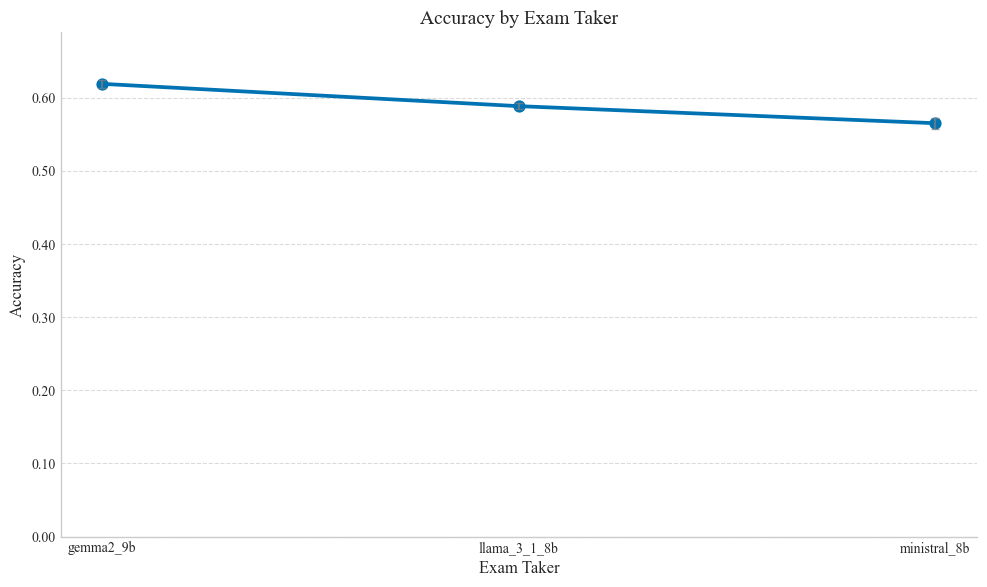

In [33]:
visualize_all_factors(domain_plot_df, output_dir='figures')
visualize_interaction_effects(df, 'rag_type', 'chunk_size', '')

In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']